<center><H1>Табличные данные</H1></center>

<H4>Обозначения</H4>

⭐ - Простое задание  
🌟 - Сложное задание  
⭐⭐ - Задание на 2 балла  
⏱ - Задание на скорость (балл получает только первый студент с каждого ряда)  
💫 - Конец задания

<H2>1. DataFrame</H2>

Рассмотрим сначала простой случай, когда объем данных позволяет полностью считать их и поместить в оперативную память  

В качестве примера возьмем данные метеорологической станции  
Найдите в директории `data/meteo` файлы с расширением __.csv__ и сохраните пути к ним в переменные

In [12]:
station = '47423'        # редактировать здесь
daily_data_path = f'data/meteo/{station}_daily.csv'       # ежедневные данные
monthly_data_path = f'data/meteo/{station}_monthly.csv'   # ежемесячные данные

<br>

Откройте эти файлы и ознакомьтесь с их содержимым  

Заголовки в таблицах означают следующее:
- time - дата измерений (для ежемесячных данных - первый день месяца)
- tavg - средняя температура в градусах Цельсия
- tmin - минимальная температура
- tmax - максимальная температура
- prcp - количество осадков в миллиметрах
- snow - количество снега в миллиметрах
- wdir - среднее направление ветра в градусах
- wspd - средняя скорость ветра в километрах в час
- wpgt - максимальная скорость порывов ветра в километрах в час
- pres - давление на уровне моря в гектопаскалях
- tsun - время солнечной погоды в минутах

_Обратите внимание, что станция у каждого своя, и данные измерений отличаются_  

Теперь попробуем считать эти данные  
Нам понадобится некоторая структура для их хранения и обработки  
В прошлой лабораторной работе вы уже познакомились с базовыми структурами данных Python: `list`, `tuple`, `dict`, `set`  
Таблицу можно было бы представить, например, вложенными списками, но есть и более удобные варианты  

Давайте познакомимся с модулем `pandas`, предназначенным для обработки табличных данных  
Для начала импортируем его

In [13]:
import pandas as pd

<br>

Также нам понадобится модуль `numpy`, на котором основан `pandas`

In [14]:
import numpy as np

<br>
Теперь применим функцию `read_csv`

In [15]:
daily_data = pd.read_csv(daily_data_path)
daily_data

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1951-01-01,NaN,-7.0,-3.8,8.3,NaN,NaN,NaN,NaN,NaN,NaN
1,1951-01-02,NaN,-6.3,-1.9,1.4,NaN,NaN,NaN,NaN,NaN,NaN
2,1951-01-03,NaN,-6.2,-3.9,2.5,NaN,NaN,NaN,NaN,NaN,NaN
3,1951-01-04,NaN,-8.6,-5.5,0.7,NaN,NaN,NaN,NaN,NaN,NaN
4,1951-01-05,NaN,-9.6,-7.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26284,2024-09-12,21.3,19.2,25.6,NaN,NaN,310.0,14.8,NaN,1015.0,NaN
26285,2024-09-14,20.3,15.1,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26286,2024-09-15,17.3,NaN,21.2,17.0,NaN,NaN,NaN,NaN,NaN,NaN
26287,2024-09-16,20.2,13.3,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_Так просто?_  
_Да!_

Но теперь нужно понять, что за структуру данных мы получили и как с ней работать  
Проверим, какому классу принадлежит объект `daily_data`

In [17]:
daily_data.__class__

pandas.core.frame.DataFrame

Если не произошло никаких ошибок, класс должен называться `DataFrame`  
`DataFrame` - это один из основных классов модуля `pandas`  

Как вы уже поняли, объекты `DataFrame` хранят табличные данные  
Рассмотрим теперь инструменты для их обработки

<H3>1.1. Индексирование

Начнем с самого простого - получим данные отдельных строк и столбцов  

Например, оставим в нашей таблице только среднюю температуру

In [18]:
t_data = daily_data['tavg']
t_data

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
26284    21.3
26285    20.3
26286    17.3
26287    20.2
26288    20.3
Name: tavg, Length: 26289, dtype: float64

<br>
Без сведений о дате получилось не очень информативно...

In [19]:
t_data = daily_data[['time', 'tavg']]
t_data

,time,tavg
0,1951-01-01,NaN
1,1951-01-02,NaN
2,1951-01-03,NaN
3,1951-01-04,NaN
4,1951-01-05,NaN
...,...,...
26284,2024-09-12,21.3
26285,2024-09-14,20.3
26286,2024-09-15,17.3
26287,2024-09-16,20.2


<br>
А теперь получим данные определенной строки

In [20]:
index = 0
daily_data.loc[index]

time    1951-01-01
tavg           NaN
tmin          -7.0
tmax          -3.8
prcp           8.3
snow           NaN
wdir           NaN
wspd           NaN
wpgt           NaN
pres           NaN
tsun           NaN
Name: 0, dtype: object

<br>

Полезнее было бы получать данные строки не по абстрактному индексу, а по дате  
Поэтому сделаем саму дату индексом!

In [21]:
daily_data['time'] = pd.to_datetime(daily_data['time'])     # ... но для начала поменяем формат на datetime, сейчас это обычный текст
daily_data = daily_data.set_index('time')                   # set_index не меняет индекс в текущей таблице, а возвращает новую

In [22]:
day = '2024-09-16'          # выберите день, который есть в таблице
daily_data.loc[day]

tavg    20.2
tmin    13.3
tmax    22.2
prcp     NaN
snow     NaN
wdir     NaN
wspd     NaN
wpgt     NaN
pres     NaN
tsun     NaN
Name: 2024-09-16 00:00:00, dtype: float64

<br>  

Можно также посмотреть данные за период времени  
_Обратите внимение, что `.loc` в данном случае писать не обязательно_

In [23]:
daily_data['2020-01-01':'2024-12-12']       # если таблица пустая, выберите другие даты

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,-3.8,-6.2,-3.0,2.5,10.0,299.0,41.5,NaN,1013.9,NaN
2020-01-02,-1.2,-4.6,-0.2,NaN,10.0,299.0,37.5,NaN,1015.3,NaN
2020-01-03,-2.3,-3.3,1.5,NaN,10.0,302.0,29.1,NaN,1012.5,NaN
2020-01-04,-4.1,-5.5,-1.6,NaN,10.0,328.0,18.1,NaN,1013.9,NaN
2020-01-05,-2.3,-5.7,-0.6,NaN,10.0,326.0,19.2,NaN,1018.7,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-12,21.3,19.2,25.6,NaN,NaN,310.0,14.8,NaN,1015.0,NaN
2024-09-14,20.3,15.1,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-15,17.3,NaN,21.2,17.0,NaN,NaN,NaN,NaN,NaN,NaN


<H3>1.2. Фильтр по условию

Попробуем узнать, в какие дни температура опускалась ниже -30 градусов  
Поскольку температура представлена в виде числовых данных, сделать это можно простым условным оператором  

_Если в результате получается пустая таблица, поменяйте значение температуры_

In [24]:
daily_data['tmin'] < -30

time
1951-01-01    False
1951-01-02    False
1951-01-03    False
1951-01-04    False
1951-01-05    False
              ...  
2024-09-12    False
2024-09-14    False
2024-09-15    False
2024-09-16    False
2024-09-17    False
Name: tmin, Length: 26289, dtype: bool

<br>

Однако в результате мы получили ряд булевых значений (выполнение условия для каждой строки таблицы)  
Интереснее будет посмотреть данные только по тем дням, когда условие выполнялось  

Для этого используем результат сравнения в качестве индекса

In [25]:
daily_data[daily_data['tmin'] < -10]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1951-01-13,NaN,-10.7,-5.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-14,NaN,-10.6,-6.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN
1952-02-02,NaN,-11.0,0.9,10.8,NaN,NaN,NaN,NaN,NaN,NaN
1952-12-22,NaN,-11.8,-6.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1954-01-23,-7.8,-11.6,-5.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2014-02-08,-4.5,-10.2,-3.4,NaN,119.0,59.0,11.7,NaN,1023.0,NaN
2018-01-25,-4.9,-10.1,-3.0,1.0,61.0,315.0,24.9,NaN,999.2,NaN
2019-02-08,-9.7,-11.1,-8.7,1.5,160.0,311.0,27.9,NaN,1014.0,NaN


<br>

_Еще раз по порядку_:  
`daily_data['tmin'] < -30` возвращает ряд булевых значений, который затем передается в  
`daily_data[...]` на место многоточия и играет роль фильтра по строкам

Таким же образом можно убрать строки с пустым значением параметра, который нас интересует

In [26]:
daily_data[~np.isnan(daily_data['tmin'])]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1951-01-01,NaN,-7.0,-3.8,8.3,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-02,NaN,-6.3,-1.9,1.4,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-03,NaN,-6.2,-3.9,2.5,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-04,NaN,-8.6,-5.5,0.7,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-05,NaN,-9.6,-7.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-10,23.3,19.5,25.5,NaN,NaN,96.0,11.9,NaN,1016.6,NaN
2024-09-11,20.6,19.7,24.0,0.5,NaN,303.0,15.1,NaN,1015.9,NaN
2024-09-12,21.3,19.2,25.6,NaN,NaN,310.0,14.8,NaN,1015.0,NaN


<br>

`np.isnan` возвращает `True` для значений `NaN`  
Оператор `~` инвертирует полученные булевы значения

<center>⭐⭐</center>

Вычислите, сколько дней в период с __1 января 1990 года__ по __31 декабря 2010 года__ средняя температура:
1. поднималась выше 20 градусов
2. опускалась ниже 0 градусов
3. не измерялась

In [28]:
tmp = daily_data['1990-01-01':'2010-12-31']
print(len(tmp[tmp['tavg'] > 20]))
print(len(tmp[tmp['tavg'] < 0]))
print(len(tmp[np.isnan(tmp['tavg'])]))

620
1338
2


<center>💫</center>

<H3>1.3. Агрегирование данных

Посчитаем минимальную, максимальную и среднюю температуру за все время работы станции

In [16]:
daily_data['tmin'].min()

np.float64(-13.4)

In [17]:
daily_data['tmax'].max()

np.float64(32.2)

In [18]:
daily_data['tavg'].mean()

np.float64(8.707080255127794)

<br>

А теперь за определенный промежуток времени

In [19]:
daily_data['2000-01-01':'2005-12-31']['tmin'].min()

np.float64(-12.1)

In [20]:
daily_data['2000-01-01':'2005-12-31']['tmax'].max()

np.float64(29.5)

In [21]:
daily_data['2000-01-01':'2005-12-31']['tavg'].mean()

np.float64(8.304416761041903)

<br>

А теперь разобьем время на недельные интервалы и посчитаем среднюю температуру на каждой неделе  

`for i in...`  
_Нет!_  

Для этого тоже есть отдельная функция

In [22]:
daily_data.resample('W')['tavg'].mean()        # 'W' означает, что период времени для группировки - неделя

time
1951-01-07          NaN
1951-01-14          NaN
1951-01-21          NaN
1951-01-28          NaN
1951-02-04          NaN
                ...    
2024-08-25    23.400000
2024-09-01          NaN
2024-09-08    22.471429
2024-09-15    20.950000
2024-09-22    20.250000
Freq: W-SUN, Name: tavg, Length: 3847, dtype: float64

<center>⭐</center>

Получите данные о среднем значении температуры за каждый месяц с помощью метода `resample`  
Сравните их с данными в таблице `monthly_data`  
Выведите строки таблицы `monthly_data`, в которых данные отличаются  
При необходимости введите допустимую погрешность

_Используйте `'ME'` в качестве аргумента для метода `resample`_

In [31]:
# Средняя температура за каждый месяц (аргумент 'MS')
monthly_avg = daily_data.resample('MS')['tavg'].mean()  
monthly_avg

time
1951-01-01          NaN
1951-02-01          NaN
1951-03-01          NaN
1951-04-01          NaN
1951-05-01          NaN
                ...    
2024-05-01    12.996552
2024-06-01    17.146667
2024-07-01    21.786667
2024-08-01    23.650000
2024-09-01    21.566667
Freq: MS, Name: tavg, Length: 885, dtype: float64

In [32]:
# Загрузка данных из CSV-файла в таблицу monthly_data
monthly_data = pd.read_csv(monthly_data_path)
# Преобразование столбца 'time' в формат datetime
monthly_data['time'] = pd.to_datetime(monthly_data['time'])
# Установка столбца 'time' в качестве индекса таблицы
monthly_data = monthly_data.set_index('time')
# Проверяем, различаются ли полученные данные с помощью метода resample оот данных в таблице monthly_data
diff = np.abs(monthly_data['tavg'] - monthly_avg)
monthly_data[diff > 0.1]

/var/folders/d5/pxppl6cj7rsbtxf0_ymgvqkh0000gn/T/ipykernel_22188/1310862624.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  monthly_data[diff > 0.1]


,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
1956-11-01,5.7,3.6,8.0,72.6,NaN,NaN,NaN
1959-01-01,-3.1,-5.5,-0.6,84.6,NaN,NaN,NaN


<center>💫</center>

<H3>1.4. Построение графиков

На прошлой лабораторной работе мы уже познакомились с модулем `matplotlib`  
Однако сейчас нам не понадобится с ним работать - за нас это сделает `pandas`

<Axes: xlabel='time'>

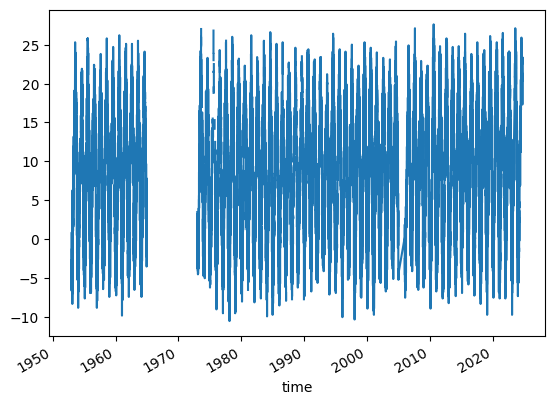

In [27]:
daily_data['tavg'].plot()

Кажется, на графике слишком много точек  
Обратимся к `resample`

<Axes: xlabel='time'>

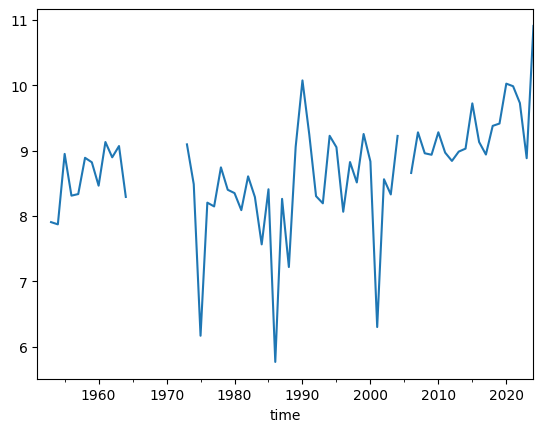

In [29]:
daily_data.resample('YE')['tavg'].mean().plot()

<br>

_Обратите внимание, что графики строятся с помощью модуля `matplotlib`, хоть мы и не обращаемся к нему напрямую_  
_При желании можно его использовать, чтобы поменять настройки (тип линии, цвет, оси, шрифт и т.п.)_

<center>⭐⭐</center>

По имеющимся данным постарайтесь определить, в какой стране (или регионе) находится ваша метеорологическая станция  
Для этого постройте 3 графика, которые посчитаете информативными  
Другие методы обработки данных также разрешаются
Обратите внимание на то, что таблицы заполнены не полностью - некоторых данных у вас может не быть  

_Если вы выполняете лабораторную работу в аудитории, это задание является командным - следуйте инструкции преподавателя_  
_Оценивается не точность выполнения, а наличие построенных графиков и логики в рассуждениях_

<Axes: xlabel='time'>

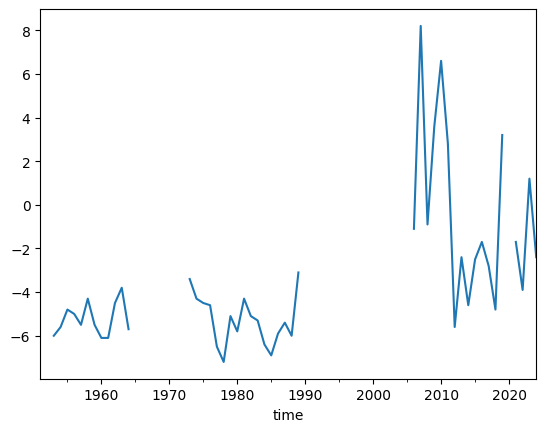

In [33]:
monthly_data.resample('YE')['tmin'].min().plot()

<Axes: xlabel='time'>

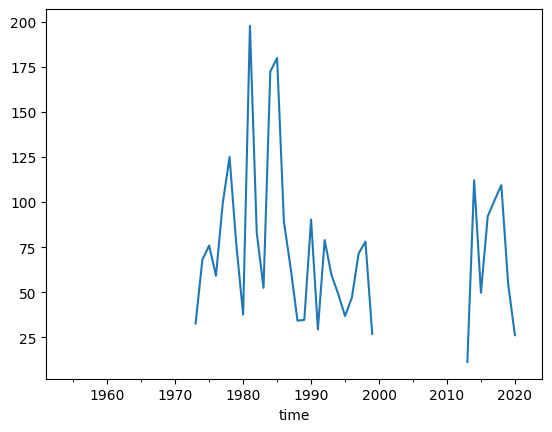

In [35]:
daily_data.resample('YE')['snow'].mean().plot()

<Axes: xlabel='time'>

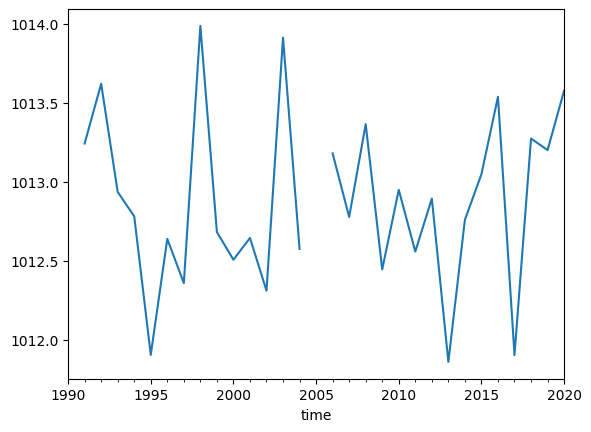

In [36]:
daily_data['1990-01-01':'2020-12-31'].resample('YE')['pres'].mean().plot()

<center>💫</center>

<H2>2. SQLite БД</H2>

На прошлой лекции вам рассказывали про язык структурированных запросов SQL  
В этой части лабораторной работы мы рассмотрим основы взаимодействия с базами данных с его использованием  
В качестве СУБД мы будем использовать SQLite  

Для работы с SQLite в Python используется встроенная библиотека sqlite3, доступная в виде одноименного модуля

In [3]:
import sqlite3

Для подключения к БД используется функция connect(), принимающий следующие аргументы:
1. `database`
2. `timeout`
3. `detect_types`
4. `isolation_level`
5. `check_same_thread`
6. `factory`
7. `cached_statements`
8. `uri`

Обязательным аргументом является только путь к базе данных - `database`  
По этой причине, чтобы лишний раз вас не путать, мы будем рассматривать только его  
Про остальные аргументы вы можете прочитать самостоятельно  

Результатом работы функции `connect()` будет объект подключения (объект класса `Connection`), через который можно взаимодействовать с БД:  

`test_connection = sqlite3.connect("empty_bd")`  

Обратите внимание, что если вы указываете название/путь до файла, которого не существует, то будет создана пустая БД

Для выполнения команд SQL и получения данных из БД необходимо создать курсор  
Для этого вызывается метод `cursor()` класса `Connection`, возвращающий объект класса `Cursor`:  

`test_cursor = test_connection.cursor()`

Ниже приведены методы класса Cursor:
1. `execute()` - выполняет одну SQL-инструкцию
2. `executemany()` - выполняет параметризованную SQL-инструкцию
3. `executescript()` - выполняет SQL-скрипт, который может содержать несколько инструкций
4. `fetchone()` - возвращает одну строку в виде кортежа из полученного из БД набора строк
5. `fetchmany()` - возвращает набор строк в виде списка
6. `fetchall()` - возвращает все оставшиеся строки в виде списка; При отсутсвии строк возвращается пустой список  

Прежде чем пойти дальше, стоит упомянуть о типах данных в SQLite  
Они соотносятся с Python следующим образом:  
None  - NULL  
int   - INTEGER  
float - REAL  
str   - TEXT  
bytes - BLOB  

Теперь попробуем протестировать рассмотренные выше методы

In [35]:
connection = sqlite3.connect(r"test.db")
cursor = connection.cursor()

# создаем таблицу "people" с тремя столбцами: 
# id (тип INTEGER) - первичный ключ, значение которого будет увеличиваться с добавлением новых строк
# name (тип TEXT) - строка, имя пользователя
# age (тип INTEGER) - возраст пользователя
cursor.execute("""CREATE TABLE people
                (id INTEGER PRIMARY KEY AUTOINCREMENT,  
                name TEXT, 
                age INTEGER)
               """)
# в этой таблице пока нет данных
connection.commit() # сохраняем изменения

In [36]:
one_person = ("Alice", 20)
# попробуем добавить данные об одном человеке в созданную таблицу
# указываем название таблицы - в нашем случае это "people"
cursor.execute("INSERT INTO people (name, age) VALUES (?, ?)", one_person)
connection.commit()

In [37]:
three_people = [("Chad", 22), ("Stacy", 19), ("Malvin", 25), ("Bob", 51), ("Ken", 33), ("Anna", 41)]
# метод executemany принимает, по сути, ту же самую SQL-инструкцию
# но теперь, данные определены в виде списка кортежей, каждый из которых представляет отдельную строку
cursor.executemany("INSERT INTO people (name, age) VALUES (?, ?)", three_people)
connection.commit()

In [38]:
# теперь попробуем вывести внесенные нами в таблицу данные
cursor.execute("SELECT * FROM people")
#print(cursor.fetchall())
# не забывайте, что данные будут представлены в виде списка кортежей
for person in cursor.fetchall():
    print(f"{person[1]} - {person[2]}")

Alice - 20
Chad - 22
Stacy - 19
Malvin - 25
Bob - 51
Ken - 33
Anna - 41


<center>⭐</center>

Проверьте, можно ли получить такой же вывод без использования метода `fetchall()`

In [39]:
cursor.execute("SELECT * FROM people")
for person in cursor:
    print(f'{person[1]} - {person[2]}')

Alice - 20
Chad - 22
Stacy - 19
Malvin - 25
Bob - 51
Ken - 33
Anna - 41


Какой вывод мы ожидаем увидеть, выполнив блок кода ниже?  
Объясните, почему получается именно такой вывод

In [40]:
cursor.execute("SELECT * FROM people")
print(cursor.fetchmany(3))

[(1, 'Alice', 20), (2, 'Chad', 22), (3, 'Stacy', 19)]


<center>💫</center>

In [41]:
connection.close() # закрываем соединение

In [42]:
connection = sqlite3.connect(r"test.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM people")

# извлекаем первые 4 строки из полученного набора
print(cursor.fetchmany(4))

[(1, 'Alice', 20), (2, 'Chad', 22), (3, 'Stacy', 19), (4, 'Malvin', 25)]


In [43]:
# извлекаем следующие 4 строки из полученного набора
print(cursor.fetchmany(4))

[(5, 'Bob', 51), (6, 'Ken', 33), (7, 'Anna', 41)]


In [44]:
connection.close()

In [45]:
connection = sqlite3.connect(r"test.db")
cursor = connection.cursor()

# метод fetchone() удобен, когда нам нужно извлечь из БД только один объект
# в данном примере мы извлекаем поля name и age для объекта, поле id которого равно 2
cursor.execute("SELECT name, age FROM people WHERE id=2")
# раскладываем кортеж на две переменных
name, age = cursor.fetchone()
print(f"Name: {name}    Age: {age}") 

Name: Chad    Age: 22


Для обновления данных в SQL используется команда UPDATE  
Попробуем изменить имя всех пользователей с возрастом меньше 20 на "Kid"

In [46]:
cursor.execute("UPDATE people SET name='Kid' WHERE age<20")
connection.commit()

Для удаления данных в SQL используется команда DELETE  
Попробуем удалить всех людей с именем Alice

In [47]:
cursor.execute("DELETE FROM people WHERE name='Alice'")
connection.commit()

Проверим, что теперь записано в БД

In [48]:
cursor.execute("SELECT * FROM people")
print(cursor.fetchall())
connection.close()

[(2, 'Chad', 22), (3, 'Kid', 19), (4, 'Malvin', 25), (5, 'Bob', 51), (6, 'Ken', 33), (7, 'Anna', 41)]


<center>⭐⭐</center>

Используя метеорологические данные из прошлой половины лабораторной работы, создайте БД содержащую следующие столбцы:
1. __num__ - первичный ключ, номер строки по порядку
2. __year__ - год измерения, число
3. __tmin__ - \
4. __tmax__ - - соответствующие средние значения для каждого года
5. __tavg__ - /

In [49]:
monthly_data = pd.read_csv(monthly_data_path)
monthly_data = monthly_data[['time', 'tmin', 'tmax', 'tavg']]
print(monthly_data.head())

         time  tmin  tmax  tavg
0  1951-01-01   NaN   NaN   NaN
1  1951-02-01   NaN   NaN   NaN
2  1951-03-01   NaN   NaN   NaN
3  1951-04-01   NaN   NaN   NaN
4  1951-05-01   NaN   NaN   NaN


In [51]:
connection = sqlite3.connect("test.db")
cursor = connection.cursor()

cursor.execute("""CREATE TABLE weather (
                num INTEGER PRIMARY KEY AUTOINCREMENT,
                time INTEGER,
                tmin REAL,
                tmax REAL,
                tavg REAL)
                """)

monthly_data.to_sql("weather", connection, if_exists="append", index = False)

connection.commit()
connection.close()

Выведите в отформатированном виде первые 20 строк данных из составленной вами БД

In [38]:
connection = sqlite3.connect("test.db")
cursor = connection.cursor()
cursor.execute("SELECT * from weather LIMIT 60")
for _ in range(60):
    print(cursor.fetchone())

(1, '1951-01-01', None, None, None)
(2, '1951-02-01', None, None, None)
(3, '1951-03-01', None, None, None)
(4, '1951-04-01', None, None, None)
(5, '1951-05-01', None, None, None)
(6, '1951-06-01', None, None, None)
(7, '1951-07-01', None, None, None)
(8, '1951-08-01', None, None, None)
(9, '1951-09-01', None, None, None)
(10, '1951-10-01', None, None, None)
(11, '1951-11-01', None, None, None)
(12, '1951-12-01', None, None, None)
(13, '1952-01-01', None, None, None)
(14, '1952-02-01', None, None, None)
(15, '1952-03-01', None, None, None)
(16, '1952-04-01', None, None, None)
(17, '1952-05-01', None, None, None)
(18, '1952-06-01', None, None, None)
(19, '1952-07-01', None, None, None)
(20, '1952-08-01', None, None, None)
(21, '1952-09-01', None, None, None)
(22, '1952-10-01', None, None, None)
(23, '1952-11-01', None, None, None)
(24, '1952-12-01', None, None, None)
(25, '1953-01-01', -5.3, -1.1, -3.1)
(26, '1953-02-01', -6.0, -1.5, -3.5)
(27, '1953-03-01', -0.5, 3.8, 1.3)
(28, '1953-0

<center>💫</center>

<center>⭐⭐</center>

Вам даны два файла БД, содержащие в себе информацию с сайта MyAnimeList на 2023 год  

В таблице `animefilteredfixed` содержатся следующие поля:  
- anime_id - уникальный ID для каждого аниме
- Name - название на языке оригинала
- Score - оценка данного тайтла
- Type - тип аниме (TV series, movie, OVA и т.д.)
- Episodes - количество эпизодов
- Aired - дата выхода в эфир
- Premiered - сезон и год премьеры
- Producers - продюссеры или продюссирующие компании
- Licensors - правообладатели
- Studios - студии, работавшие над созданием аниме
- Source - на чем основывается (manga, light novel, original)
- Duration - длительность эпизода
- Rating - возрастной рейтинг
- Ranked - ранг тайтла, основанный на его популярности и других критериях
- Popularity - популярность данного тайтла
- Members - сколько человек добавили данный тайтл себе в подборку
- Favorites - сколько раз это аниме добавляли в избранное
- Watching - сколько человек смотрят сейчас
- Completed - сколько человек посмотрели полностью
- On_Hold - у скольких человек в списке отложеного
- Dropped - сколько человек бросили

В таблице `finalanimedataset` содержатся следующие поля:  
- anime_id --- эти 4 столбца уже были определены выше
- type ------/
- source ---/
- score  --/
- username - имя пользователя
- my_score - какую оценку поставил этот пользователь выбранному аниме
- user_id - ID пользователя
- gender - пол пользователя
- title - название аниме на языке оригинала
- scored_by - сколько человек поставили оценку данному аниме
- rank - то же что и Ranked
- popularity - ранг популярности
- genre - жанры

Вашим заданием будет собрать статистику по имеющимся данным:
1. Построить график, где по оси X обозначено значение score, а по оси Y - количество аниме с таким значением score
2. Построить график, где по оси X обозначено число голосов за определенное аниме, а по оси Y - количество аниме, с таким количеством голосов
3. Построить таблицу, в которой будут 3 столбца - название аниме, его score, сколько человек проголосовали за данный тайтл
   Сортировка производится по последнему столбцу
   Число строк в таблице - 15

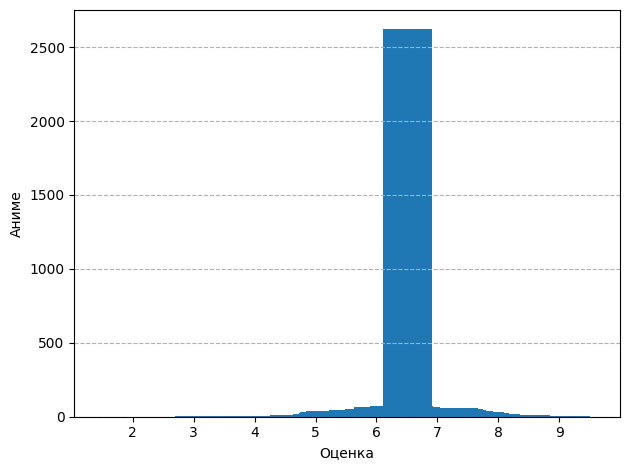

In [5]:
import matplotlib.pyplot as plt

connection = sqlite3.connect('animefilteredfixed.sqlite')
cursor = connection.cursor()

cursor.execute("""
SELECT score, COUNT(*) AS anime_count
FROM animefilteredfixed
GROUP BY score
ORDER BY score;
""")

results = cursor.fetchall()

connection.close()

# Разделяем данные на два списка: scores и anime_counts
scores = [row[0] for row in results]
anime_counts = [row[1] for row in results]

plt.xlabel('Оценка')
plt.ylabel('Аниме')
plt.bar(scores, anime_counts)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

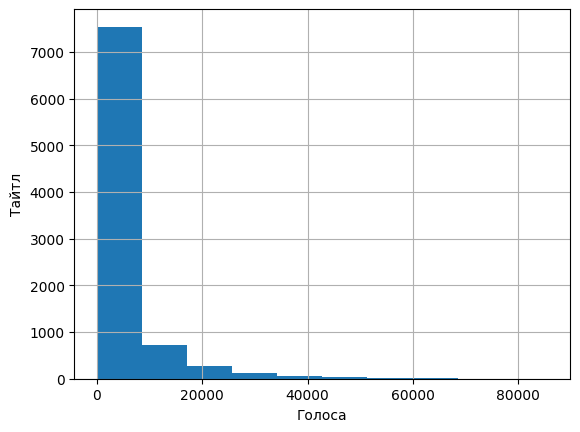

In [37]:
connection = sqlite3.connect('finalanimedataset.sqlite')

votes = pd.read_sql_query("SELECT anime_id, COUNT(*) as vote_count FROM finalanimedataset GROUP BY anime_id",
                          connection)

plt.hist(votes['vote_count'])
plt.xlabel('Голоса')
plt.ylabel('Тайтл')
plt.grid(True)
plt.show()
connection.close()

In [42]:
connection1 = sqlite3.connect('animefilteredfixed.sqlite')
connection2 = sqlite3.connect('finalanimedataset.sqlite')

anime = pd.read_sql_query("SELECT anime_id, Name, Score FROM animefilteredfixed",
                          connection1)
votes = pd.read_sql_query("SELECT anime_id, COUNT(*) as vote_count FROM finalanimedataset GROUP BY anime_id",
                          connection2)

merged = pd.merge(anime, votes, on='anime_id')

top_15_anime = merged[['Name', 'Score', 'vote_count']].sort_values(by='Score', ascending=False).tail(15)
top_15_anime.columns = ['Название аниме', 'Оценка', 'Количество голосов']

print(top_15_anime)

connection1.close()
connection2.close()

                    Название аниме  Оценка  Количество голосов
6570                   Fetish Doll    3.09                 235
7158         Good-by Elvis and USA    3.09                 148
7523                      Mochibei    3.02                 238
5988                       Shitcom    2.78                2129
4247             Ningen Doubutsuen    2.77                 656
7827                    Love Bites    2.66                 275
6573                 Aki no Puzzle    2.63                 188
7699                      Ai (ONA)    2.61                 269
3896   Abunai Sisters: Koko & Mika    2.50                 435
7198                          Nami    2.35                 845
7537                      Kokuhaku    2.30                 353
3796                  Tsui no Sora    2.26                 286
387                Hametsu no Mars    2.23                6705
5632            Utsu Musume Sayuri    2.01                1228
2804  Tenkuu Danzai Skelter+Heaven    1.85             

<center>💫</center>